In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors, cm
from joypy import joyplot
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv("Barcelona_rent_price.csv")
data.dropna()

data_rent = data[data["Average _rent"]=="average rent (euro/month)"]
data_surf = data[data["Average _rent"]=="average rent per surface (euro/m2)"]

clusters = data_rent.groupby(['Year'])
clusters2 = data_surf.groupby(['Year'])

data_rent['year_avg'] = clusters['Price'].transform('mean')
data_surf['year_avg'] = clusters2['Price'].transform('mean')

data_rent.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price,year_avg
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55,661.639048
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79,661.639048
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71,661.639048
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44,661.639048
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09,661.639048


In [24]:
# Custom colormap

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

averages = data_rent['year_avg'].unique()
av_norm = normalize(averages)

averages2 = data_surf['year_avg'].unique()
av_norm2 = normalize(averages2)

viridis = cm.get_cmap('viridis', 256)
rent_colors = viridis(av_norm)
surf_colors = viridis(av_norm2)

In [25]:
newcmp = colors.ListedColormap(rent_colors)
newcmp2 = colors.ListedColormap(surf_colors)

<Figure size 432x288 with 0 Axes>

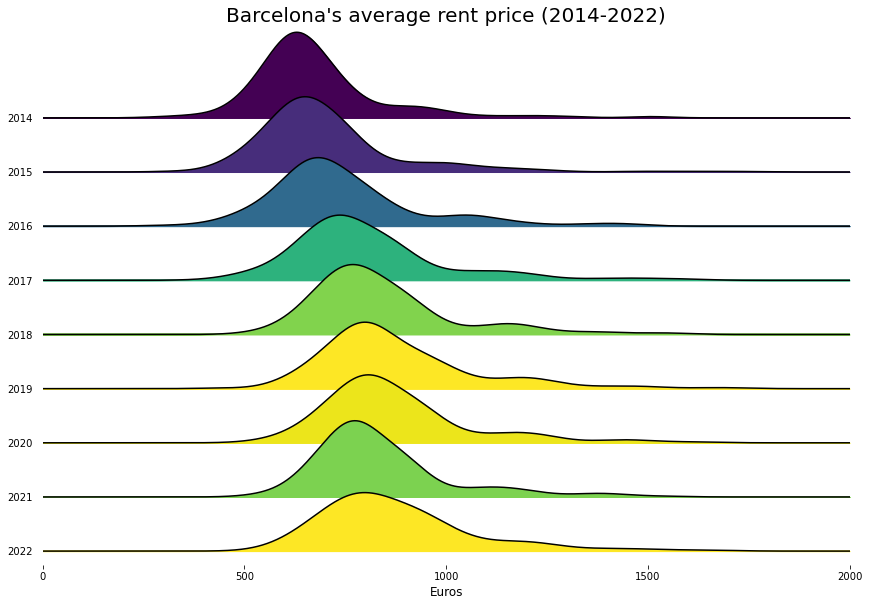

In [27]:
plt.figure()

joyplot(
    data=data_rent[['Price', 'Year']],
    by='Year',
    colormap=newcmp,
    figsize=(12,8)
)
plt.xlabel('Euros', fontsize=12)
plt.title("Barcelona's average rent price (2014-2022)", fontsize=20)
plt.xlim(0,2000)
plt.show()

<Figure size 432x288 with 0 Axes>

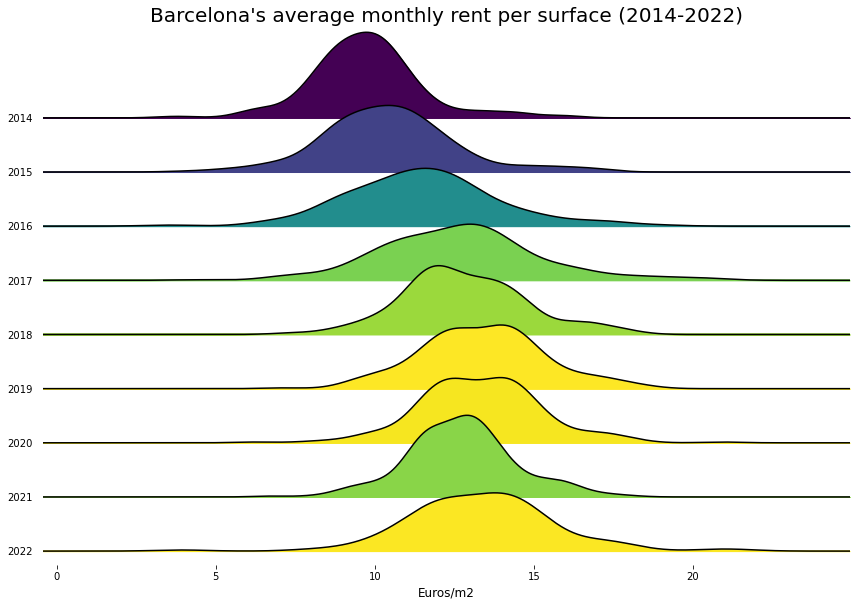

In [29]:
plt.figure()

joyplot(
    data=data_surf[['Price', 'Year']],
    by='Year',
    colormap=newcmp2,
    figsize=(12,8)
)
plt.xlabel("Euros/m2", fontsize=12)
plt.title("Barcelona's average monthly rent per surface (2014-2022)", fontsize=20)
plt.show()